In [259]:
import re
import json
import matplotlib.pylab as plt
import numpy as np
import glob
%matplotlib inline
all_test_acc = []
all_test_err = []
all_train_loss = []
all_test_loss = []
all_cardinalities = []
all_depths = []
all_widths = []
for file in glob.glob('logs_cardinality/Cifar2/*.txt'):
    with open(file) as logs:
        next(logs)
        test_acc = []
        test_err = []
        train_loss = []
        test_loss = []
        i = 0
        for line in logs:
            i += 1
            if i % 2 != 0:
                for t in re.finditer(r"\{.*\}", line):
                    try:
                        data = json.loads(t.group())
                        train_loss.append(data['train_loss'])
                        test_loss.append(data['test_loss'])
                        test_acc.append(data['test_accuracy'])
                        test_err.append((1-data['test_accuracy'])*100)
                        cardinality = data['cardinality']
                        depth = data['depth']
                        width = data['base_width']
                    except ValueError:
                        pass
        all_test_acc.append(test_acc)
        all_test_err.append(test_err)
        all_train_loss.append(train_loss)
        all_test_loss.append(test_loss)
        all_cardinalities.append(cardinality)
        all_depths.append(depth)
        all_widths.append(width)
epochs = np.arange(0, 300, 2)

In [240]:
ordered_test_err = []
ordered_test_err.append(all_test_err[all_cardinalities.index(1)])
ordered_test_err.append(all_test_err[all_cardinalities.index(2)])
ordered_test_err.append(all_test_err[all_cardinalities.index(4)])
ordered_test_err.append(all_test_err[all_cardinalities.index(8)])
ordered_test_err.append(all_test_err[all_cardinalities.index(16)])
all_cardinalities = sorted(all_cardinalities)

In [251]:
ordered_test_err = []
ordered_test_err.append(all_test_err[all_depths.index(20)])
ordered_test_err.append(all_test_err[all_depths.index(29)])
all_depths = sorted(all_depths)

In [260]:
ordered_test_err = []
ordered_test_err.append(all_test_err[all_widths.index(32)])
ordered_test_err.append(all_test_err[all_widths.index(64)])
all_widths = sorted(all_widths)

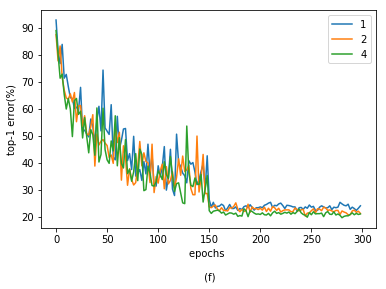

In [243]:
for file_no in range(0, 3):
    plt.plot(epochs, ordered_test_err[file_no])
plt.legend([cardinality for cardinality in all_cardinalities[0:3]], loc='upper right')
plt.xlabel('epochs \n\n (f)')
plt.ylabel('top-1 error(%)')
plt.show()

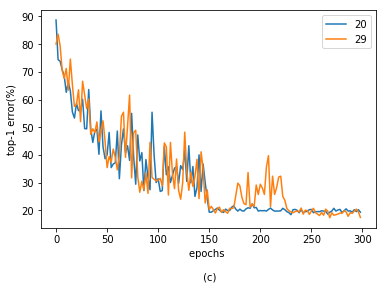

In [252]:
for file_no in range(0, 2):
    plt.plot(epochs, ordered_test_err[file_no])
plt.legend([depth for depth in all_depths], loc='upper right')
plt.xlabel('epochs \n\n (c)')
plt.ylabel('top-1 error(%)')
# plt.title('(a)')
plt.show()

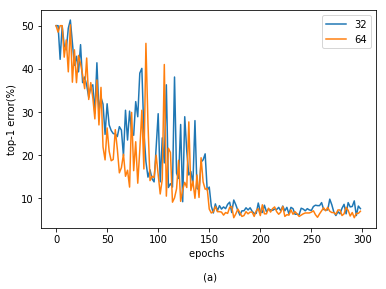

In [261]:
for file_no in range(0, 2):
    plt.plot(epochs, ordered_test_err[file_no])
plt.legend([width for width in all_widths], loc='upper right')
plt.xlabel('epochs \n\n (a)')
plt.ylabel('top-1 error(%)')
plt.show()

In [147]:
cardinalities = [1, 2, 4, 8, 16]
params = [5.6, 9.8, 18.3, 34.4, 68.1]
text = ['1x64d', '2x64d', '4x64d', '8x64d', '16x64d']
cifar29 = [[0.786, 0.797, 0.803, 0.83, 0.823], [0.886, 0.887, 0.86, 0.914, 0.92], [0.939, 0.939, 0.941, 0.946, 0.946]]

Text(0.5,1,'CIFAR 2 Dataset')

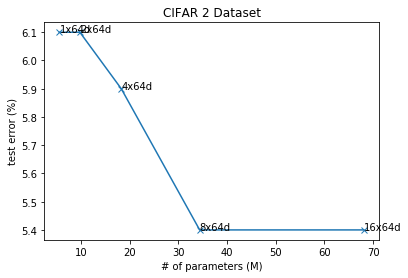

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = [(1-val)*100 for val in cifar29[2]]
ax.plot(params, y, 'x-')
plt.xlabel('# of parameters (M)')
plt.ylabel('test error (%)')
for i, txt in enumerate(text):
    ax.annotate(txt, (params[i], y[i]))
plt.title('CIFAR 2 Dataset')